# Add auxiliary features to the dataset
`sudo apt install nvidia-utils-535` to get GPU running

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd
from churn_pred.preprocessing import auxiliary_data, preprocess_text
import spacy_fastlang

In [2]:
df_pd = pd.read_csv("data/dataset.csv")
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,I can not link my card to any third-party plat...,160980.03,1,0,0,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,"Last week, I reached out to my bank's support ...",151762.74,1,0,1,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,NaN,82767.42,1,1,0,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,NaN,128743.80,1,0,0,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,"Yo, I gotta give some love to this bank's cust...",133550.67,1,1,1,46941.41,0


## Sentiment analysis

### Cleaning and langauge detection

In [3]:
df_pd = preprocess_text.text_cleaning(df=df_pd, text_col="CustomerFeedback")
df_pd = preprocess_text.language_detection(
    df=df_pd, text_col="CustomerFeedback", model_type="fasttext"
)

Cleaning Progress: 100%|██████████| 10000/10000 [00:34<00:00, 287.95it/s]


In [4]:
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score
0,747,15787619,Hsieh,844,France,Male,18,2,link card _IS_PUNCT_ party platform _IS_PUNCT_,160980.03,1,0,0,145936.28,0,en,0.786177
1,1620,15770309,McDonald,656,France,Male,18,10,week _IS_PUNCT_ reach bank support team confus...,151762.74,1,0,1,127014.32,0,en,0.911405
2,1679,15569178,Kharlamov,570,France,Female,18,4,nan,82767.42,1,1,0,71811.90,0,ht,0.974604
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,nan,128743.80,1,0,0,197322.13,0,ht,0.974604
4,2137,15621893,Bellucci,727,France,Male,18,4,Yo _IS_PUNCT_ get to love bank customer servic...,133550.67,1,1,1,46941.41,0,en,0.758962


In [5]:
df_pd[df_pd["CustomerFeedback"].astype(str) != "nan"][
    "CustomerFeedback_language"
].unique()

array(['en'], dtype=object)

In [6]:
df_pd[
    (df_pd["CustomerFeedback"].astype(str) != "nan")
    & (df_pd["CustomerFeedback_language_score"] < 0.5)
]

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score
105,2866,15590228,Greenwalt,715,France,Male,21,6,hsi,76467.16,1,1,1,173511.72,0,en,0.124504
6270,7107,15723989,Carroll,646,France,Male,40,5,fund accessible anticipate date _IS_PUNCT_ _IS...,93680.43,2,1,1,179473.26,0,en,0.468742


In [7]:
df_pd.loc[105, ["CustomerFeedback"]] = "nan"

<Axes: ylabel='Frequency'>

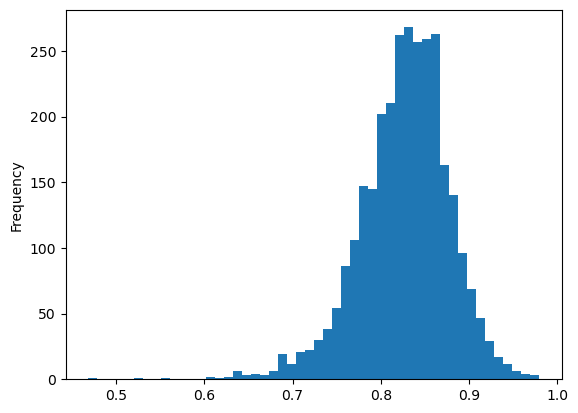

In [8]:
df_pd[df_pd["CustomerFeedback"].astype(str) != "nan"][
    "CustomerFeedback_language_score"
].plot.hist(bins=50)

### Sentiment analysis prediction

In [9]:
df_pd[["CustomerFeedback_sentiment3", "CustomerFeedback_sentiment3_score"]] = (
    preprocess_text.sentiment_analysis(
        df=df_pd, text_col="CustomerFeedback", sentiment_depth=3
    )[["CustomerFeedback_sentiment", "CustomerFeedback_sentiment_score"]]
)
df_pd.head()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score,CustomerFeedback_sentiment3,CustomerFeedback_sentiment3_score
0,747,15787619,Hsieh,844,France,Male,18,2,link card _IS_PUNCT_ party platform _IS_PUNCT_,160980.03,1,0,0,145936.28,0,en,0.786177,neutral,0.827256
1,1620,15770309,McDonald,656,France,Male,18,10,week _IS_PUNCT_ reach bank support team confus...,151762.74,1,0,1,127014.32,0,en,0.911405,neutral,0.671348
2,1679,15569178,Kharlamov,570,France,Female,18,4,nan,82767.42,1,1,0,71811.90,0,ht,0.974604,neutral,0.680865
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,nan,128743.80,1,0,0,197322.13,0,ht,0.974604,neutral,0.680865
4,2137,15621893,Bellucci,727,France,Male,18,4,Yo _IS_PUNCT_ get to love bank customer servic...,133550.67,1,1,1,46941.41,0,en,0.758962,positive,0.878306


In [10]:
df_pd[["CustomerFeedback_sentiment5", "CustomerFeedback_sentiment5_score"]] = (
    preprocess_text.sentiment_analysis(
        df=df_pd, text_col="CustomerFeedback", sentiment_depth=5
    )[["CustomerFeedback_sentiment", "CustomerFeedback_sentiment_score"]]
)
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),...,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score,CustomerFeedback_sentiment3,CustomerFeedback_sentiment3_score,CustomerFeedback_sentiment5,CustomerFeedback_sentiment5_score
0,747,15787619,Hsieh,844,France,Male,18,2,link card _IS_PUNCT_ party platform _IS_PUNCT_,160980.03,...,0,0,145936.28,0,en,0.786177,neutral,0.827256,4 stars,0.259499
1,1620,15770309,McDonald,656,France,Male,18,10,week _IS_PUNCT_ reach bank support team confus...,151762.74,...,0,1,127014.32,0,en,0.911405,neutral,0.671348,1 star,0.359483
2,1679,15569178,Kharlamov,570,France,Female,18,4,nan,82767.42,...,1,0,71811.90,0,ht,0.974604,neutral,0.680865,2 stars,0.260568
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,nan,128743.80,...,0,0,197322.13,0,ht,0.974604,neutral,0.680865,2 stars,0.260568
4,2137,15621893,Bellucci,727,France,Male,18,4,Yo _IS_PUNCT_ get to love bank customer servic...,133550.67,...,1,1,46941.41,0,en,0.758962,positive,0.878306,1 star,0.291449


In [11]:
# save intermediate results
df_pd.to_parquet("data/dataset_sentiment.parquet")

## Surname origin country

In [3]:
# df_pd = pd.read_parquet("data/dataset_sentiment.parquet")

In [12]:
df_pd["Surname" + "_Country"] = auxiliary_data.surname_origin(
    df=df_pd, surname_col="Surname"
)
df_pd.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),...,IsActiveMember,EstimatedSalary,Exited,CustomerFeedback_language,CustomerFeedback_language_score,CustomerFeedback_sentiment3,CustomerFeedback_sentiment3_score,CustomerFeedback_sentiment5,CustomerFeedback_sentiment5_score,Surname_Country
0,747,15787619,Hsieh,844,France,Male,18,2,link card _IS_PUNCT_ party platform _IS_PUNCT_,160980.03,...,0,145936.28,0,en,0.786177,neutral,0.827256,4 stars,0.259499,"Taiwan, Province of China"
1,1620,15770309,McDonald,656,France,Male,18,10,week _IS_PUNCT_ reach bank support team confus...,151762.74,...,1,127014.32,0,en,0.911405,neutral,0.671348,1 star,0.359483,United States
2,1679,15569178,Kharlamov,570,France,Female,18,4,nan,82767.42,...,0,71811.90,0,ht,0.974604,neutral,0.680865,2 stars,0.260568,Russian Federation
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,nan,128743.80,...,0,197322.13,0,ht,0.974604,neutral,0.680865,2 stars,0.260568,Russian Federation
4,2137,15621893,Bellucci,727,France,Male,18,4,Yo _IS_PUNCT_ get to love bank customer servic...,133550.67,...,1,46941.41,0,en,0.758962,positive,0.878306,1 star,0.291449,Italy


In [13]:
df_pd[(df_pd["Surname_Country"] == "NA")]["Surname"].nunique()

496

less than 500 so I can use Namsor free trial to get data,
I will use their [online csv tool](https://namsor.app/csv-excel-tool/) and not API function`auxiliary_data.surname_origin_namsor` to avoid wasting another email address for free trail 

In [6]:
namsor_csv = pd.DataFrame(
    {"Surname": df_pd[(df_pd["Surname_Country"] == "NA")]["Surname"].unique()}
)
namsor_csv["first_name"] = "unset"
namsor_csv.to_csv("data/surnames/surnames_for_namsor.csv", index=False)

after namsor processing

In [14]:
# keep_default_na=False as NA-Namibia is intrepreted as NaN
namsor_surnames = pd.read_csv(
    "data/surnames/namsor_name-origin_surnames_for_namsor.csv",
    keep_default_na=False,
    na_values=["_"],
)
namsor_surnames = namsor_surnames[["lastName", "countryOrigin"]].rename(
    columns={"lastName": "Surname", "countryOrigin": "Surname_Country_namsor"}
)

In [15]:
namsor_surnames["Surname_Country_namsor"] = auxiliary_data.get_country_name(
    df=namsor_surnames, country_name_col="Surname_Country_namsor"
)
namsor_surnames.head()

,Surname,Surname_Country_namsor
0,Vaguine,France
1,Onyekaozulu,Nigeria
2,Chiazagomekpele,Nigeria
3,Fleetwood-Smith,United Kingdom
4,Anayolisa,Nigeria


In [16]:
df_pd = df_pd.merge(namsor_surnames, on="Surname", how="left")

In [17]:
df_pd.loc[(df_pd["Surname_Country"] == "NA"), "Surname_Country"] = df_pd.loc[
    (df_pd["Surname_Country"] == "NA"), "Surname_Country_namsor"
]

In [18]:
df_pd = df_pd.drop(columns=["Surname_Country_namsor"])

In [19]:
df_pd["Surname_Country"].unique()

array(['Taiwan, Province of China', 'United States', 'Russian Federation',
       'Italy', 'Macao', 'Ireland', 'United Kingdom', 'Nigeria', 'France',
       'Algeria', 'Germany', 'Malaysia', 'Mexico', 'Hong Kong', 'China',
       'Israel', 'Kazakhstan', 'Colombia', 'Lesotho', 'Saudi Arabia',
       'Uruguay', 'Togo', 'Ethiopia', 'Spain', 'Egypt', 'Ukraine',
       'Lebanon', 'Zimbabwe', 'India', 'Thailand', 'Brazil', 'Panama',
       'Türkiye', "Côte d'Ivoire", 'South Africa', 'Azerbaijan', 'Congo',
       'Czechia', 'Burkina Faso', 'Uzbekistan', 'Morocco', 'Ghana',
       'Portugal', 'Austria', 'Sri Lanka', 'Bulgaria', 'Norway', 'Greece',
       'Estonia', 'Bangladesh', 'Viet Nam', 'Netherlands', 'Cameroon',
       'Sweden', 'Costa Rica', 'Japan', 'Liberia', 'Myanmar',
       'Brunei Darussalam', 'Canada', 'Moldova, Republic of', 'Denmark',
       'Benin', 'Niger', 'Latvia', 'Finland', 'Chile', 'Poland',
       'Switzerland', 'Mozambique', 'Indonesia', 'Rwanda', 'Argentina',
       'N

In [20]:
country_info_problematic_vals = {
    "Iran, Islamic Republic of": "Iran",
    "Moldova, Republic of": "Moldova",
    "Taiwan, Province of China": "Taiwan",
    "Czechia": "Czech republic",
    "Côte d'Ivoire": "Ivory Coast",
    "Brunei Darussalam": "Brunei",
    "Viet Nam": "Vietnam",
    "Macao": "Macau",
    "Türkiye": "Turkey",
    "Congo": "Democratic Republic of the Congo",
    "Palestine, State of": "Palestine",
}
df_pd["Surname_Country"] = df_pd["Surname_Country"].replace(
    country_info_problematic_vals
)

## Additional country info

### Country region and subregion

In [21]:
df_pd[["Surname_Country_region", "Surname_Country_subregion"]] = (
    auxiliary_data.get_country_region_subregion(
        df=df_pd, country_name_col="Surname_Country"
    )
)

In [22]:
df_pd[
    (df_pd["Surname_Country_region"] == "NA")
    | (df_pd["Surname_Country_subregion"] == "NA")
][["Surname_Country", "Surname_Country_region", "Surname_Country_subregion"]]

,Surname_Country,Surname_Country_region,Surname_Country_subregion
2024,Myanmar,NA,NA
3322,Myanmar,NA,NA
4237,Myanmar,NA,NA
4626,Myanmar,NA,NA
4892,Myanmar,NA,NA
5348,Palestine,NA,NA
6190,Myanmar,NA,NA
7064,Myanmar,NA,NA
7098,Myanmar,NA,NA
7693,Myanmar,NA,NA


In [23]:
# https://en.wikipedia.org/wiki/Palestine_(region) - 'Western Asia' to follow countryinfo naming
df_pd.loc[
    df_pd["Surname_Country"] == "Palestine",
    ["Surname_Country_region", "Surname_Country_subregion"],
] = ("Asia", "Western Asia")
# https://en.wikipedia.org/wiki/Myanmar - 'South-Eastern Asia' to follow countryinfo naming
df_pd.loc[
    df_pd["Surname_Country"] == "Myanmar",
    ["Surname_Country_region", "Surname_Country_subregion"],
] = ("Asia", "South-Eastern Asia")

df_pd[
    (df_pd["Surname_Country_region"] == "NA")
    | (df_pd["Surname_Country_subregion"] == "NA")
]

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,CustomerFeedback,Balance (EUR),...,Exited,CustomerFeedback_language,CustomerFeedback_language_score,CustomerFeedback_sentiment3,CustomerFeedback_sentiment3_score,CustomerFeedback_sentiment5,CustomerFeedback_sentiment5_score,Surname_Country,Surname_Country_region,Surname_Country_subregion


In [24]:
df_pd[["Country_region", "Country_subregion"]] = (
    auxiliary_data.get_country_region_subregion(df=df_pd, country_name_col="Country")
)

In [25]:
df_pd[(df_pd["Country_region"] == "NA") | (df_pd["Country_subregion"] == "NA")][
    ["Country", "Country_region", "Country_subregion"]
]

,Country,Country_region,Country_subregion


### Native or not
 * if the client is possibly an immigrant(from immigrant family?) or not

In [26]:
df_pd["is_native"] = (df_pd["Surname_Country"] == df_pd["Country"]).astype(int)

### Country hemisphere
* could be usefull with some timestamp combination to know the season(oposite season in hemispeheres) etc.; anything that might affect mood/behaviour

In [27]:
# no need to know the hemisphere of the surname origin country...
df_pd = auxiliary_data.hemisphere(df=df_pd, cc_col="Country").rename(
    columns={"hemisphere": "Country_hemisphere"}
)

### Country gdpp
* check 'wealthiness' of the current and origin country

In [28]:
df_pd = auxiliary_data.gdppc(df=df_pd, country_name_col="Country").rename(
    columns={
        "gdp_per_capita": "Country_gdp_per_capita",
        "IncomeGroup": "Country_IncomeGroup",
    }
)
df_pd = auxiliary_data.gdppc(df=df_pd, country_name_col="Surname_Country").rename(
    columns={
        "gdp_per_capita": "Surname_Country_gdp_per_capita",
        "IncomeGroup": "Surname_Country_IncomeGroup",
    }
)

/home/jovyan/assignment/ecovadis_assignment/churn_pred/preprocessing/auxiliary_data.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita.rename(columns={"Country Code": "iso_a3"}, inplace=True)
/home/jovyan/assignment/ecovadis_assignment/churn_pred/preprocessing/auxiliary_data.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita["gdp_per_capita"] = gdp_per_capita_raw.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"]).ffill(axis=1).iloc[:, -1]
/home/jovyan/assignment/ecovadis_assignment/churn_pred/pre

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='NG-NI', country_code='NG', name='Niger', parent_code=None, type='State')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')


## Additional age info

In [29]:
df_pd = auxiliary_data.age_categories(df=df_pd, age_col="Age")

In [30]:
df_pd[df_pd["Surname_Country_gdp_per_capita"].isna()]["Surname_Country"].unique()

array(['Taiwan', 'Macau', 'Turkey', 'Ivory Coast',
       'Democratic Republic of the Congo'], dtype=object)

In [31]:
# Taiwan is missing info in worldbank but it is present e.g. here https://www.ceicdata.com/en/indicator/taiwan/gdp-per-capita
df_pd.loc[df_pd["Surname_Country"] == "Taiwan", ["Surname_Country_gdp_per_capita"]] = (
    32756.0
)
# remaining countries have some naming issues - ToBeResolved; e.g. Macau -> Macao, Turkey -> Turkiye, etc
df_pd.loc[df_pd["Surname_Country"] == "Macau", ["Surname_Country_gdp_per_capita"]] = (
    61230.96247
)
df_pd.loc[df_pd["Surname_Country"] == "Turkey", ["Surname_Country_gdp_per_capita"]] = (
    38355.15397
)
df_pd.loc[
    df_pd["Surname_Country"] == "Ivory Coast", ["Surname_Country_gdp_per_capita"]
] = 6540.462355
df_pd.loc[
    df_pd["Surname_Country"] == "Democratic Republic of the Congo",
    ["Surname_Country_gdp_per_capita"],
] = 1337.834149

In [32]:
df_pd.to_parquet("data/dataset_auxiliary_features_raw.parquet")

In [33]:
df_pd.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Country',
       'Gender', 'Age', 'Tenure', 'CustomerFeedback', 'Balance (EUR)',
       'NumberOfProducts', 'HasCreditCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CustomerFeedback_language',
       'CustomerFeedback_language_score', 'CustomerFeedback_sentiment3',
       'CustomerFeedback_sentiment3_score', 'CustomerFeedback_sentiment5',
       'CustomerFeedback_sentiment5_score', 'Surname_Country',
       'Surname_Country_region', 'Surname_Country_subregion', 'Country_region',
       'Country_subregion', 'is_native', 'Country_hemisphere',
       'Country_gdp_per_capita', 'Country_IncomeGroup',
       'Surname_Country_gdp_per_capita', 'Surname_Country_IncomeGroup',
       'working_class', 'stage_of_life', 'generation'],
      dtype='object')

In [34]:
df_pd.drop(
    columns=[
        "RowNumber",
        "Surname",
        "CustomerFeedback",
        "CustomerFeedback_language",
        "CustomerFeedback_language_score",
        "CustomerFeedback_sentiment3_score",
        "CustomerFeedback_sentiment5_score",
    ]
).to_parquet("data/dataset_auxiliary_features_cleaned.parquet")

# Appendix [TBD]
* analyze score and probabilities of the sentiment and country detection methods
* make an object or procedure to do this automatically 